In [36]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline

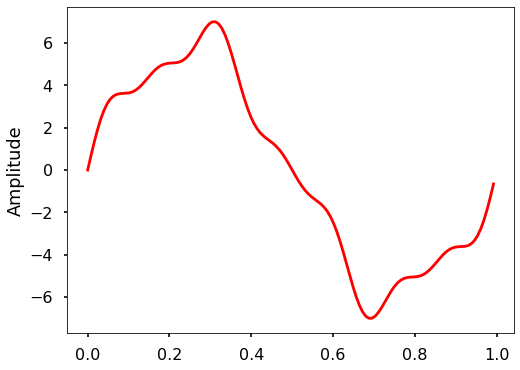

In [55]:
# sampling rate
sr = 128
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 6*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

In [56]:
def FT(x):

    N = len(x)
    
    if N == 1:
        return x
    else:
        X_even = FT(x[::2])
        X_odd = FT(x[1::2])
        factor = \
          np.exp(-2j*np.pi*np.arange(N)/ N)
        
        X = np.concatenate(\
            [X_even+factor[:int(N/2)]*X_odd,
             X_even+factor[int(N/2):]*X_odd])
        return X

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


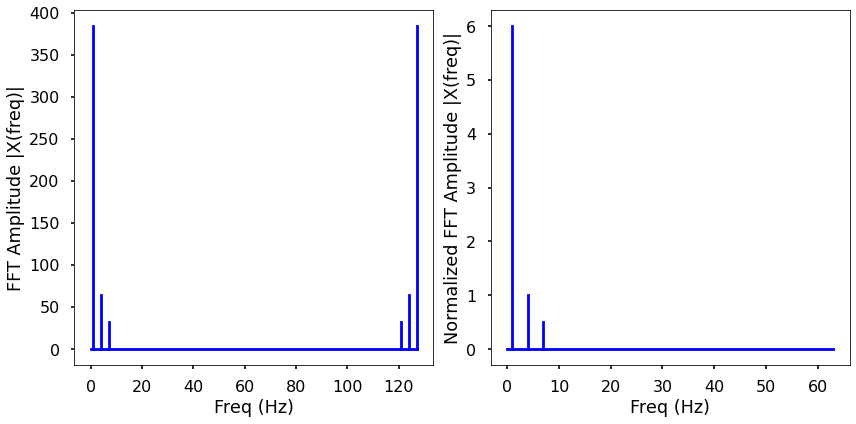

In [57]:
X=FT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Normalized FFT Amplitude |X(freq)|')
plt.tight_layout()
plt.show()

In [58]:
def gen_sig(sr):
 
    ts = 1.0/sr
    t = np.arange(0,1,ts)

    freq = 1.
    x = 6*np.sin(2*np.pi*freq*t)
    return x

In [62]:
# sampling rate =2048
sr = 2048
%timeit FT(gen_sig(sr))

30.7 ms ± 1.02 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


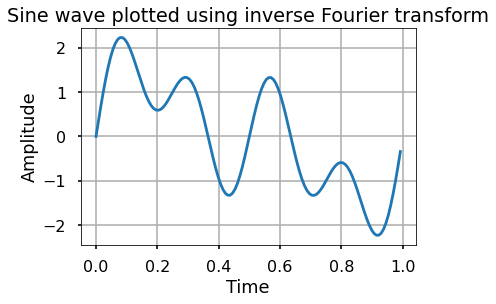

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Time period
#t = np.arange(0, 10, 0.01) 

# Create a sine wave with multiple frequencies(1 Hz, 2 Hz and 4 Hz)
a = np.sin(2*np.pi*t) + np.sin(2*2*np.pi*t) + np.sin(4*2*np.pi*t)


# Do a Fourier transform on the signal
tx  = np.fft.fft(a)
 
# Do an inverse Fourier transform on the signal
itx = np.fft.ifft(tx)

# Plot the original sine wave using inverse Fourier transform
plt.plot(t, a);
plt.title("Sine wave plotted using inverse Fourier transform")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)

plt.show();

In [64]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline

In [65]:
def IFT(X):
  
    N = len(X)
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(2j * np.pi * k * n / N)
    inverse = np.dot(M, X)/sr
    return inverse

In [66]:
signal = IFT(X)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


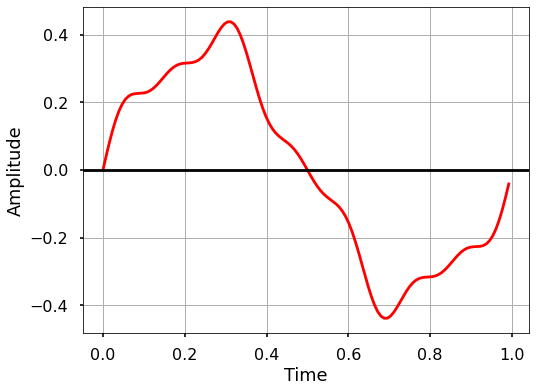

In [67]:
plt.figure(figsize = (8, 6))
plt.plot(t , signal , 'r')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.grid(linewidth = 1)
plt.axhline(0, c="black")
plt.show();